# Spotify Audio Features Exploratory Data Analysis

In [43]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from matplotlib.patches import Rectangle
from scipy.stats import relfreq

warnings.filterwarnings('ignore')

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'arial'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load data

In [12]:
df_spotify = pd.read_csv('../src/data/spotify_preprocessed.csv')
df_spotify = df_spotify.drop(['billboard_df_index'], axis = 1)
df_spotify.sample(3)

spotify_song spotify_artist  \
2371                         That's All - 2007 Remaster        Genesis   
2646                                     U Got the Look         Prince   
3352  Flava in Ya Ear Remix (feat. Notorious B.I.G.,...     Craig Mack   

      duration_minutes  popularity  explicit  acousticness  danceability  \
2371          4.425550        65.0       0.0         0.224         0.697   
2646          3.795117        52.0       0.0         0.172         0.832   
3352          5.033550        60.0       1.0         0.272         0.520   

      energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
2371   0.627          0.013800  4.0    0.0600    -7.941   0.0       0.0328   
2646   0.453          0.000023  9.0    0.0549   -15.012   1.0       0.0618   
3352   0.847          0.000000  9.0    0.3250    -5.300   1.0       0.4270   

        tempo  time_signature  valence  
2371   87.695             4.0    0.797  
2646  122.363             4.0    0.783  
3352  177.371             4.0    0.799

## Univariate distributions

In [9]:
df_spotify.columns

Index(['spotify_song', 'spotify_artist', 'duration_minutes', 'popularity',
       'explicit', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence',
       'billboard_df_index'],
      dtype='object')

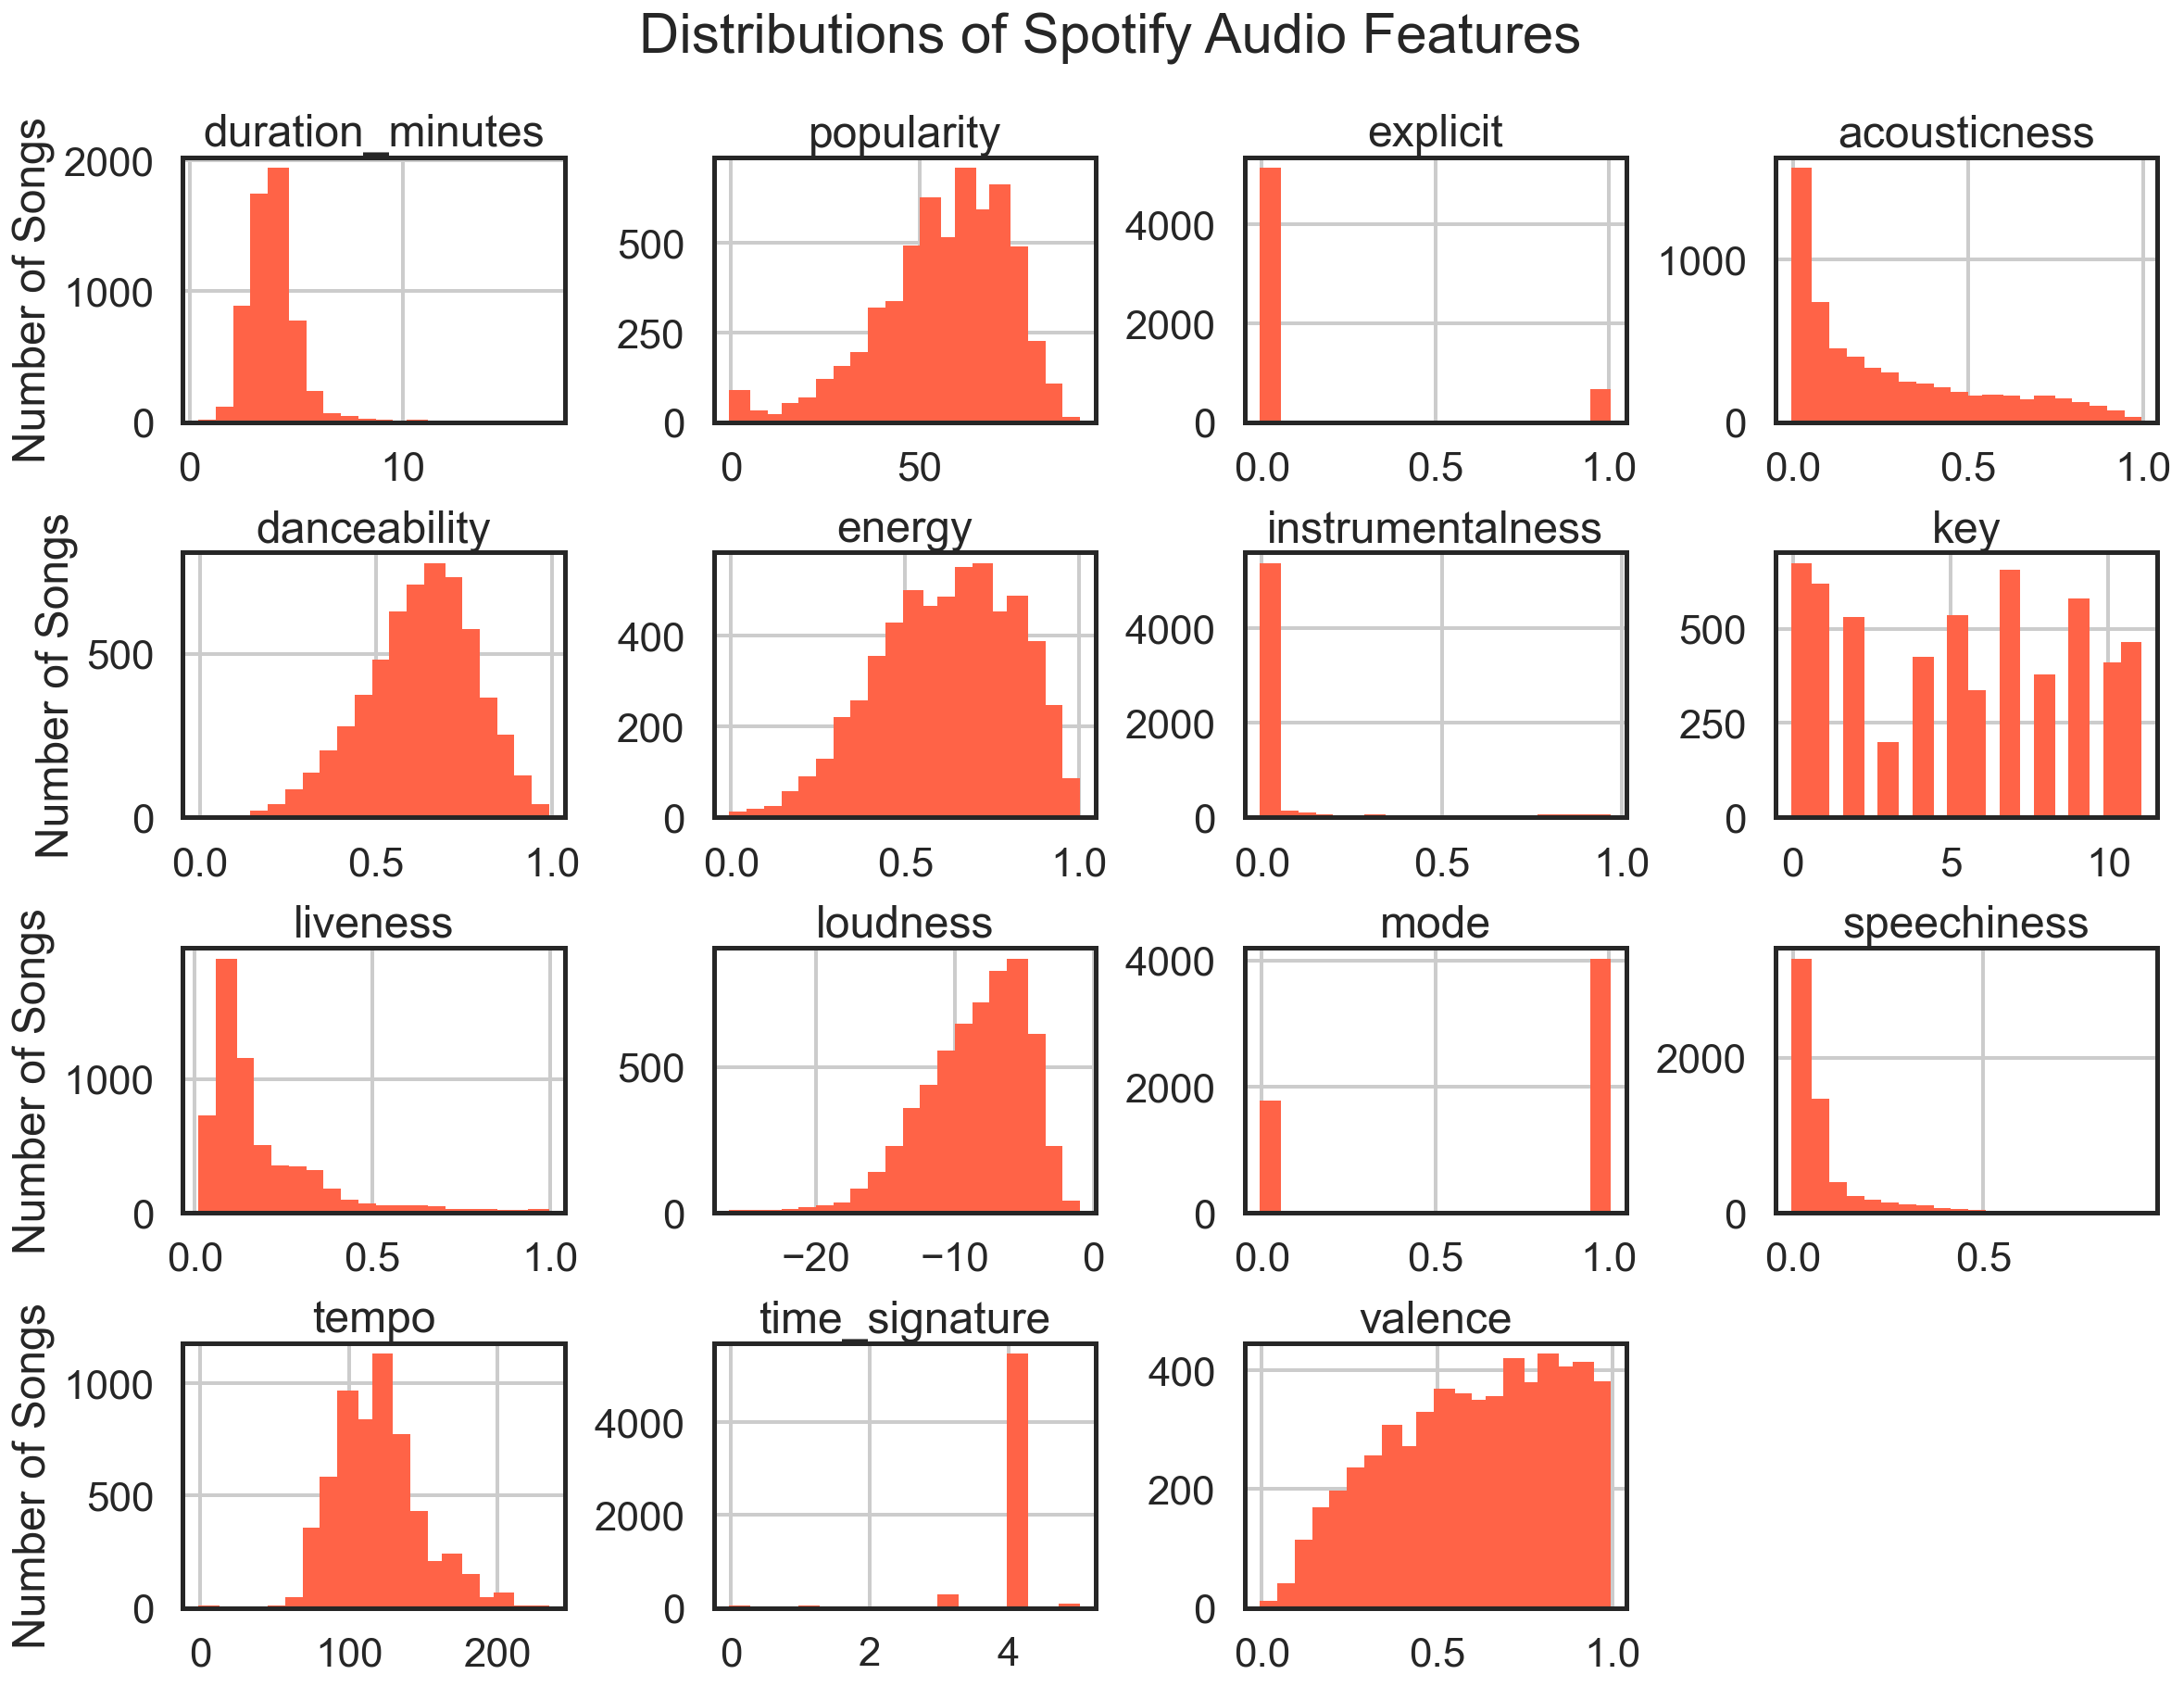

In [37]:
axes = df_spotify.hist(figsize=(16,12), bins=20, alpha=1,
                       facecolor='tomato', edgecolor='tomato');
axes = axes.ravel()
plt.tight_layout()

titles = df_spotify.columns[2:]

for i in range(len(axes)-1):
    axes[i].set_title(titles[i])
    if i % 4 == 0:
        axes[i].set_ylabel('Number of Songs')
plt.suptitle('Distributions of Spotify Audio Features', fontsize=30, y=1.05);

In [40]:
df_spotify[df_spotify['duration_minutes'] > 10]

spotify_song     spotify_artist  \
1336  The Story of Nanette: Nanette / Alabama Song /...       Bette Midler   
1340                                        Masterpiece    The Temptations   
1348                            Also Sprach Zarathustra            Deodato   
1435                  Tubular Bells - Two Sides Excerpt      Mike Oldfield   
1591                              Love To Love You Baby       Donna Summer   
1822                      Don't Let Me Be Misunderstood    Santa Esmeralda   
2595                                     A Love Bizarre          Sheila E.   
3370                  Bop Gun (One Nation) - Remastered           Ice Cube   
5229                                    Not a Bad Thing  Justin Timberlake   

      duration_minutes  popularity  explicit  acousticness  danceability  \
1336         14.033783         7.0       0.0        0.7660         0.418   
1340         13.840000        50.0       0.0        0.1530         0.789   
1348         11.052217        13.0       0.0        0.4310         0.448   
1435         13.479333         1.0       0.0        0.4900         0.283   
1591         16.808883        47.0       0.0        0.2920         0.622   
1822         10.475783        60.0       0.0        0.0329         0.669   
2595         12.300883        47.0       0.0        0.0217         0.768   
3370         11.086000        40.0       1.0        0.2570         0.845   
5229         11.474217        57.0       1.0        0.5270         0.308   

      energy  instrumentalness   key  liveness  loudness  mode  speechiness  \
1336   0.423          0.000000   2.0    0.9730   -13.149   1.0       0.1640   
1340   0.392          0.476000  10.0    0.0299   -15.395   0.0       0.0345   
1348   0.763          0.359000   0.0    0.2910   -11.657   1.0       0.0493   
1435   0.201          0.002480   9.0    0.1300   -16.649   0.0       0.0322   
1591   0.425          0.000057  10.0    0.0498   -16.256   1.0       0.0520   
1822   0.815          0.001050   9.0    0.0498    -8.998   0.0       0.0838   
2595   0.612          0.023900   1.0    0.0513   -13.381   1.0       0.0454   
3370   0.663          0.000790   6.0    0.2430    -8.756   1.0       0.0508   
5229   0.563          0.000005   0.0    0.1340    -9.169   1.0       0.0719   

        tempo  time_signature  valence  
1336  112.789             4.0    0.317  
1340  119.000             4.0    0.895  
1348  117.938             4.0    0.513  
1435  149.531             4.0    0.149  
1591   96.168             4.0    0.417  
1822  117.809             4.0    0.784  
2595  113.798             4.0    0.878  
3370  103.053             4.0    0.752  
5229   85.901             4.0    0.109

## Correlation heatmap 

Text(0.4, 1, 'Correlation Matrix Heatmap')

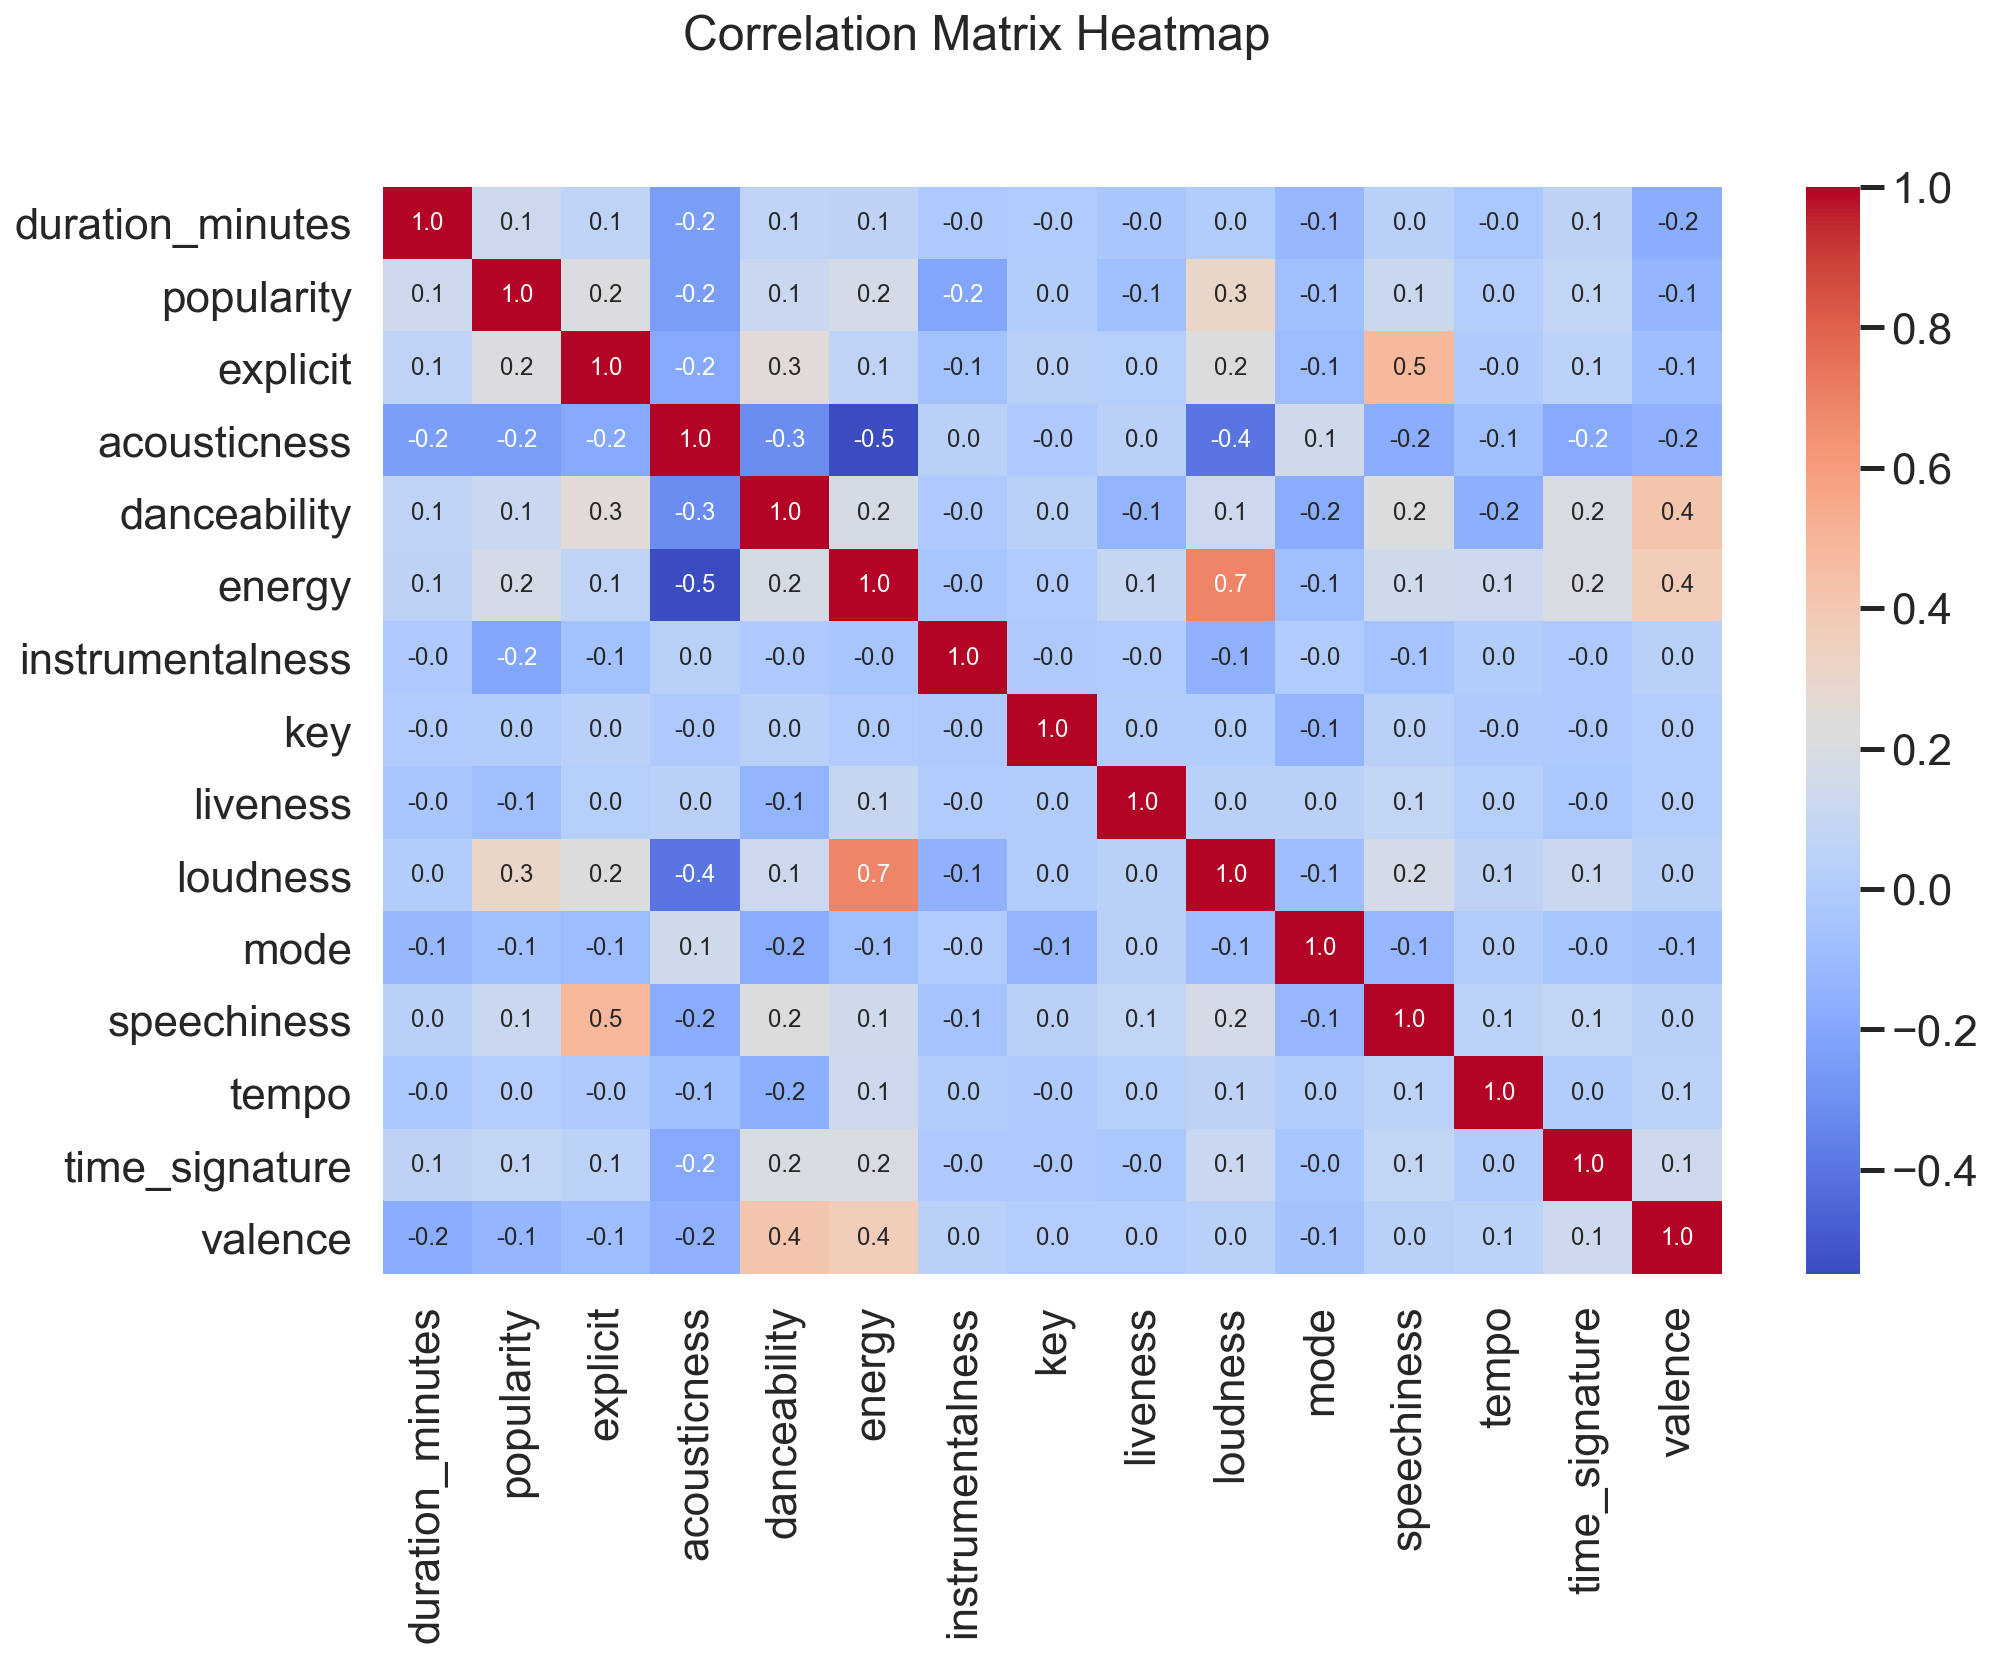

In [67]:
columns = df_spotify.columns[2:]
df_numeric = df_spotify[columns]

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':12})
plt.suptitle('Correlation Matrix Heatmap', fontsize=24, x=0.4, y=1)

## Bivariate distributions

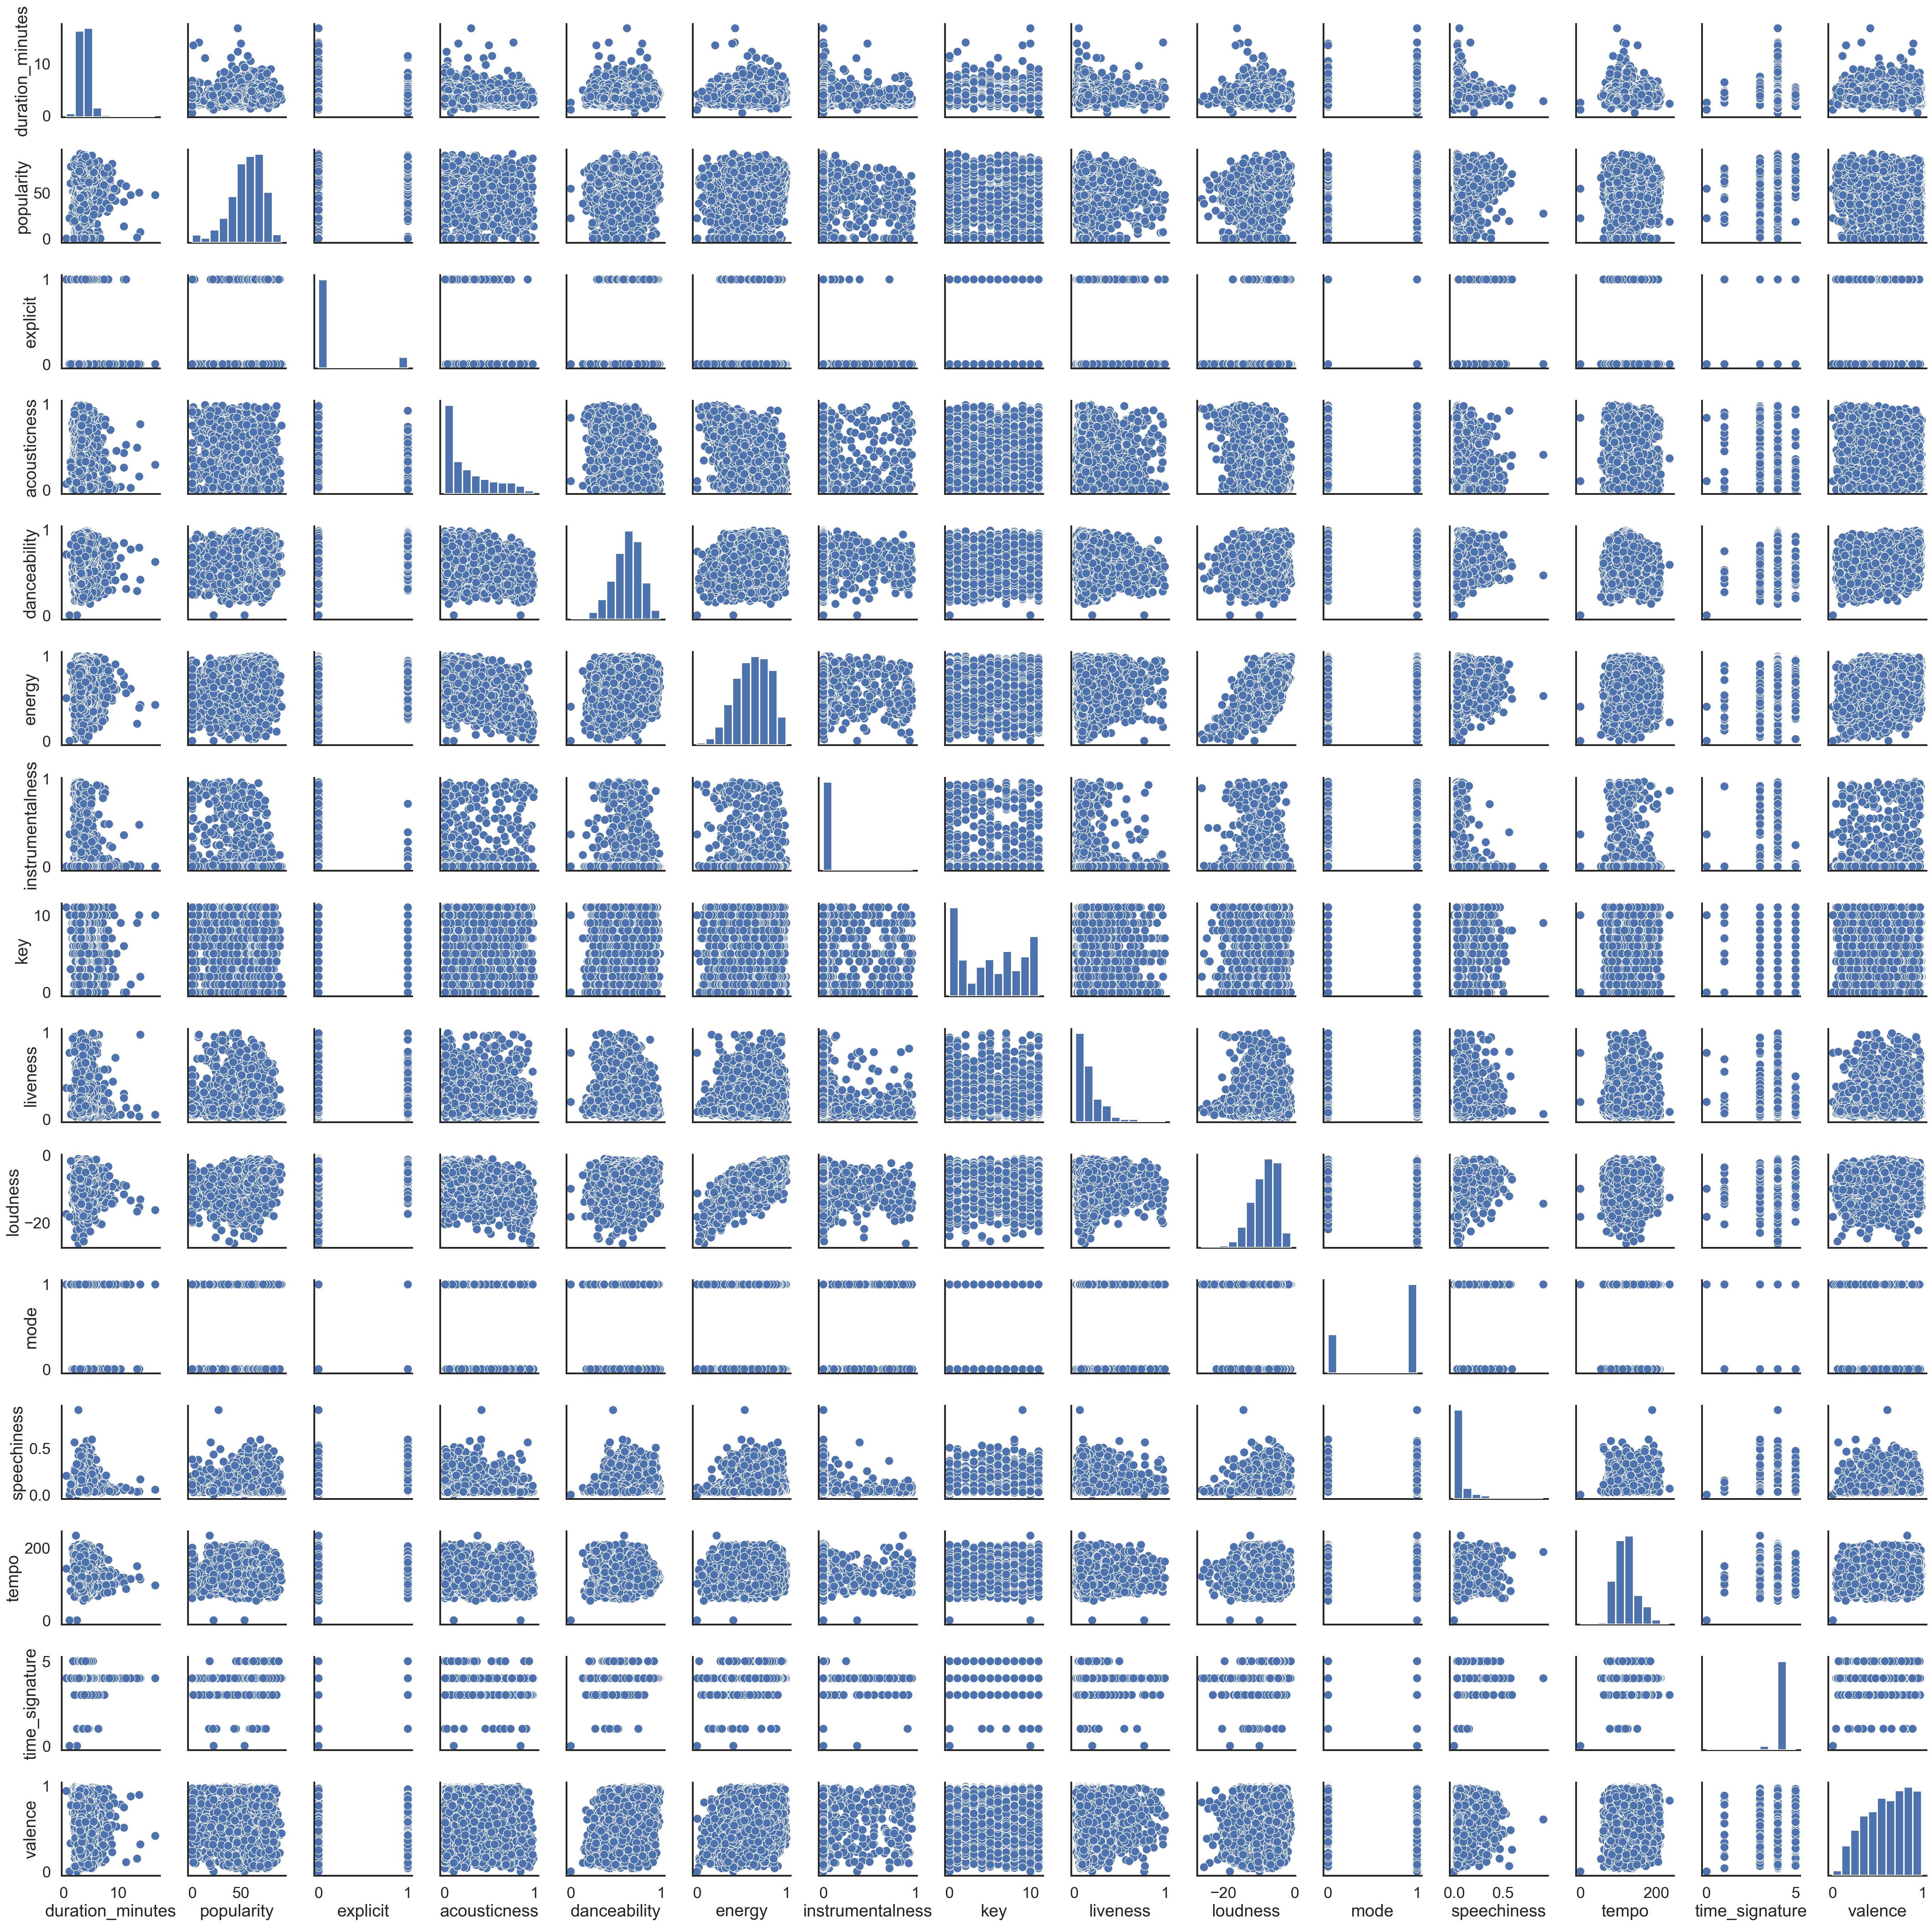

In [68]:
# Pairplot

sns.pairplot(df_numeric)

Text(0.5, 1.05, 'Closely Related Audio Features')

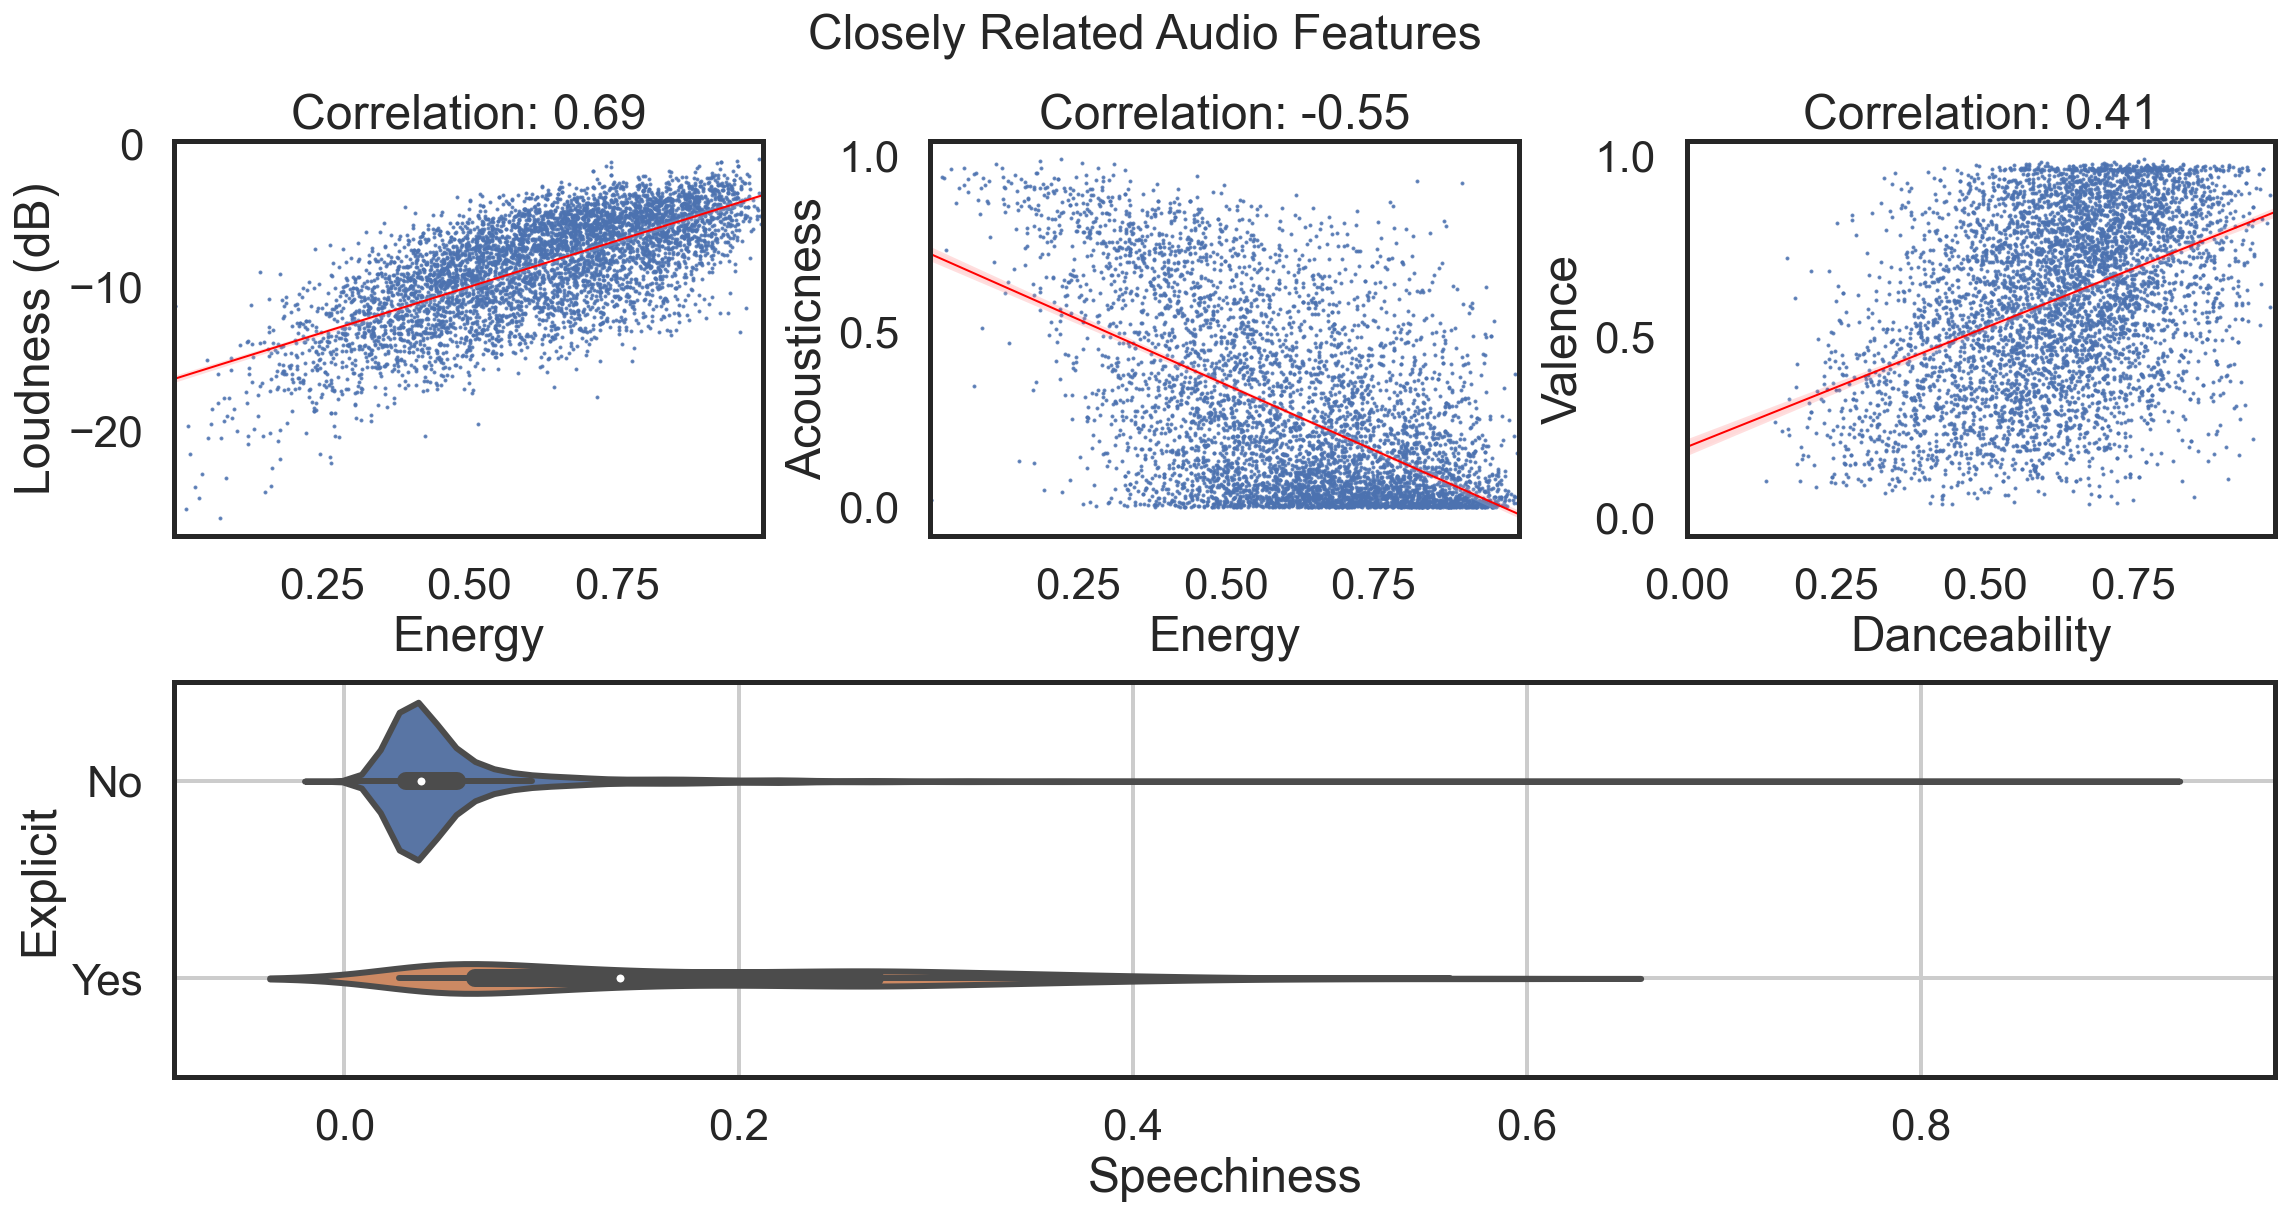

In [69]:
# generate subplot axes
axes = list()
plt.figure(figsize = (16,8))
grid_positions = [231, 232, 233, 212]
for position in grid_positions:
    axes.append(plt.subplot(position))
    
feature_pairs = [('energy', 'loudness'), ('energy', 'acousticness'),
                 ('danceability', 'valence')]

# generate upper scatter plots
for (x, y), ax in zip(feature_pairs, axes[:3]):
    r = np.corrcoef(df_spotify[x].dropna(), df_spotify[y].dropna())[0][1]
    sns.regplot(data=df_spotify, x=x, y=y, line_kws= {'linewidth': 1, 'color': 'red'},
                scatter_kws={'s': 1}, label='test', ax=ax)
    ax.set(title='Correlation: {:.2}'.format(r))
axes[0].set(ylabel='Loudness (dB)', xlabel='Energy')
axes[1].set(ylabel='Acousticness', xlabel='Energy')
axes[2].set(ylabel='Valence', xlabel='Danceability')


# generate lower violin plot
sns.violinplot(data=df_spotify, x='speechiness', y='explicit', orient='horizontal',
               split=True, ax=axes[3])
axes[3].grid(True)
axes[3].set(ylabel='Explicit', xlabel='Speechiness')
axes[3].set_yticks([0,1])
axes[3].set_yticklabels(['No', 'Yes'])

plt.tight_layout()
plt.suptitle('Closely Related Audio Features', fontsize=24, y=1.05)